In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_features_and_match_sift(img_path_1,img_path_2):
    # Load images in grayscale
    img1 = cv2.imread(img_path_1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img_path_2, cv2.IMREAD_GRAYSCALE)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

    # Draw keypoints
    img1_keypoints = cv2.drawKeypoints(img1, keypoints1, None,
                                    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    img2_keypoints = cv2.drawKeypoints(img2, keypoints2, None,
                                    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    # Match descriptors
    matches = bf.match(descriptors1, descriptors2)

    # Sort matches by distance (best matches first)
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw top N matches
    N = 10
    matched_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2,
                                matches[:N], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Convert to RGB and display
    matched_img_rgb = cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20, 10))
    plt.imshow(matched_img_rgb)
    plt.title(f'Top {N} SIFT Feature Matches')
    plt.axis('off')
    plt.show()


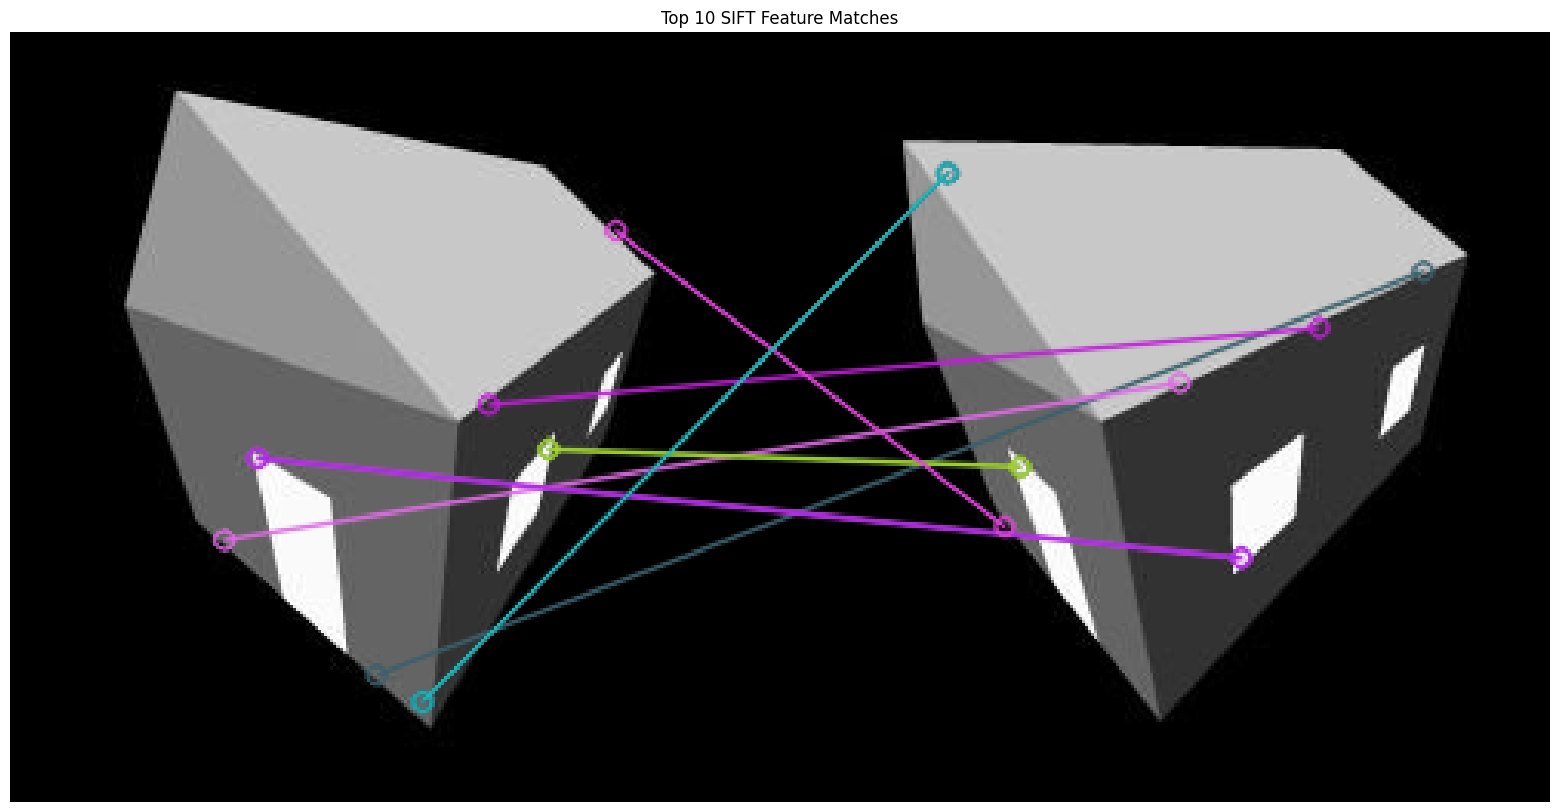

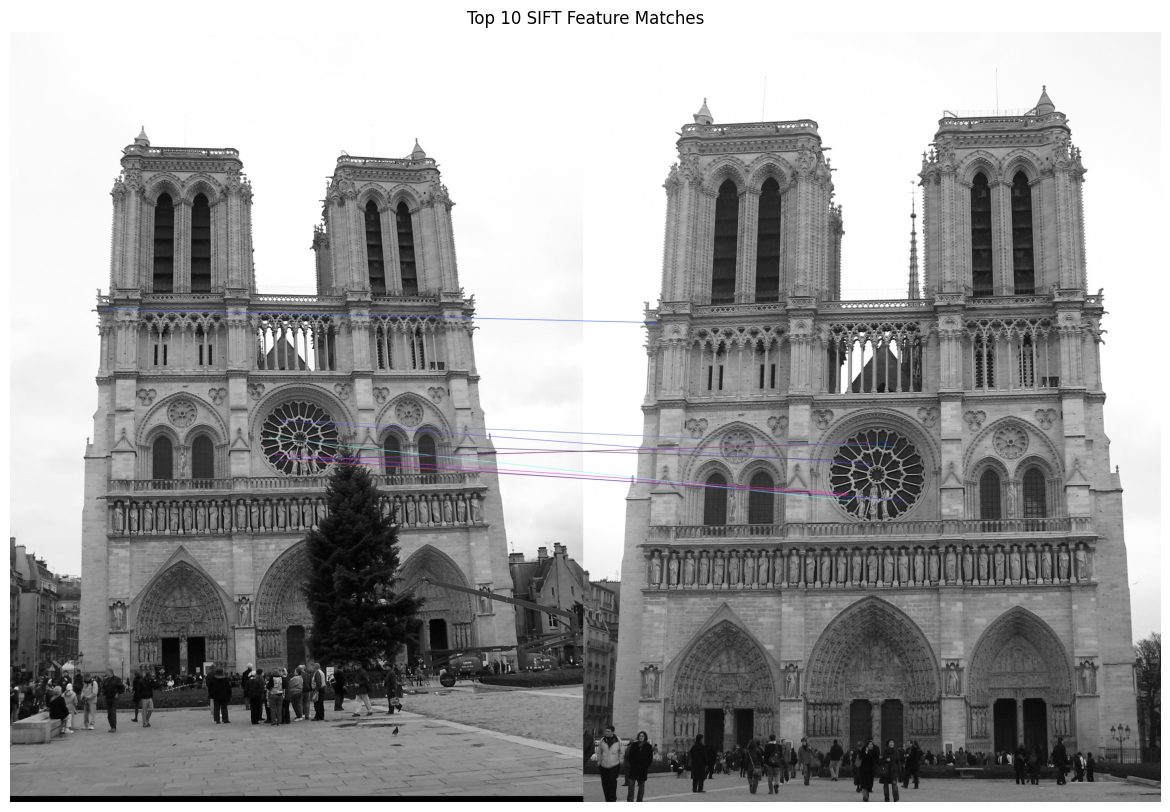

In [12]:
img_path_dict = {r"data\left.jpg":r"data\right.jpg",r"data\notre_dame1.jpg":r"data\notre_dame2.jpg"}

for img_path_1,img_path_2 in img_path_dict.items():
    compute_features_and_match_sift(img_path_1,img_path_2)

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_features_and_match_harris(img_path_1, img_path_2):
    # Load images in grayscale
    img1 = cv2.imread(img_path_1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img_path_2, cv2.IMREAD_GRAYSCALE)

    # Step 1: Detect Harris corners in both images
    def get_harris_corners(image):
        # Parameters for Harris corner detection
        blockSize = 2
        ksize = 3
        k = 0.04

        # Compute Harris corner response
        dst = cv2.cornerHarris(np.float32(image), blockSize, ksize, k)

        # Dilate corner image to enhance corner points
        dst = cv2.dilate(dst, None)

        # Threshold to get binary image of corners
        ret, dst_thresh = cv2.threshold(dst, 0.01 * dst.max(), 255, 0)
        dst_thresh = np.uint8(dst_thresh)

        # Find centroids of the corners
        ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst_thresh)

        # Refine corner locations
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
        corners = cv2.cornerSubPix(np.float32(image), np.float32(centroids), (5,5), (-1,-1), criteria)

        return corners

    corners1 = get_harris_corners(img1)
    corners2 = get_harris_corners(img2)

    # Step 2: Create keypoints from corner positions
    keypoints1 = [cv2.KeyPoint(x=float(c[0]), y=float(c[1]), size=3) for c in corners1]
    keypoints2 = [cv2.KeyPoint(x=float(c[0]), y=float(c[1]), size=3) for c in corners2]

    # Step 3: Compute descriptors at keypoints using SIFT
    sift = cv2.SIFT_create()

    keypoints1, descriptors1 = sift.compute(img1, keypoints1)
    keypoints2, descriptors2 = sift.compute(img2, keypoints2)

    # Step 4: Match descriptors using BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    # Ensure descriptors are not None
    if descriptors1 is None or descriptors2 is None:
        print("Descriptors are None, cannot match features.")
        return

    matches = bf.match(descriptors1, descriptors2)

    # Sort matches by distance (best matches first)
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw top N matches
    N = 50  # You can adjust this value
    matched_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2,
                                  matches[:N], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Convert to RGB and display
    matched_img_rgb = cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20, 10))
    plt.imshow(matched_img_rgb)
    plt.title(f'Top {N} Harris Feature Matches')
    plt.axis('off')
    plt.show()


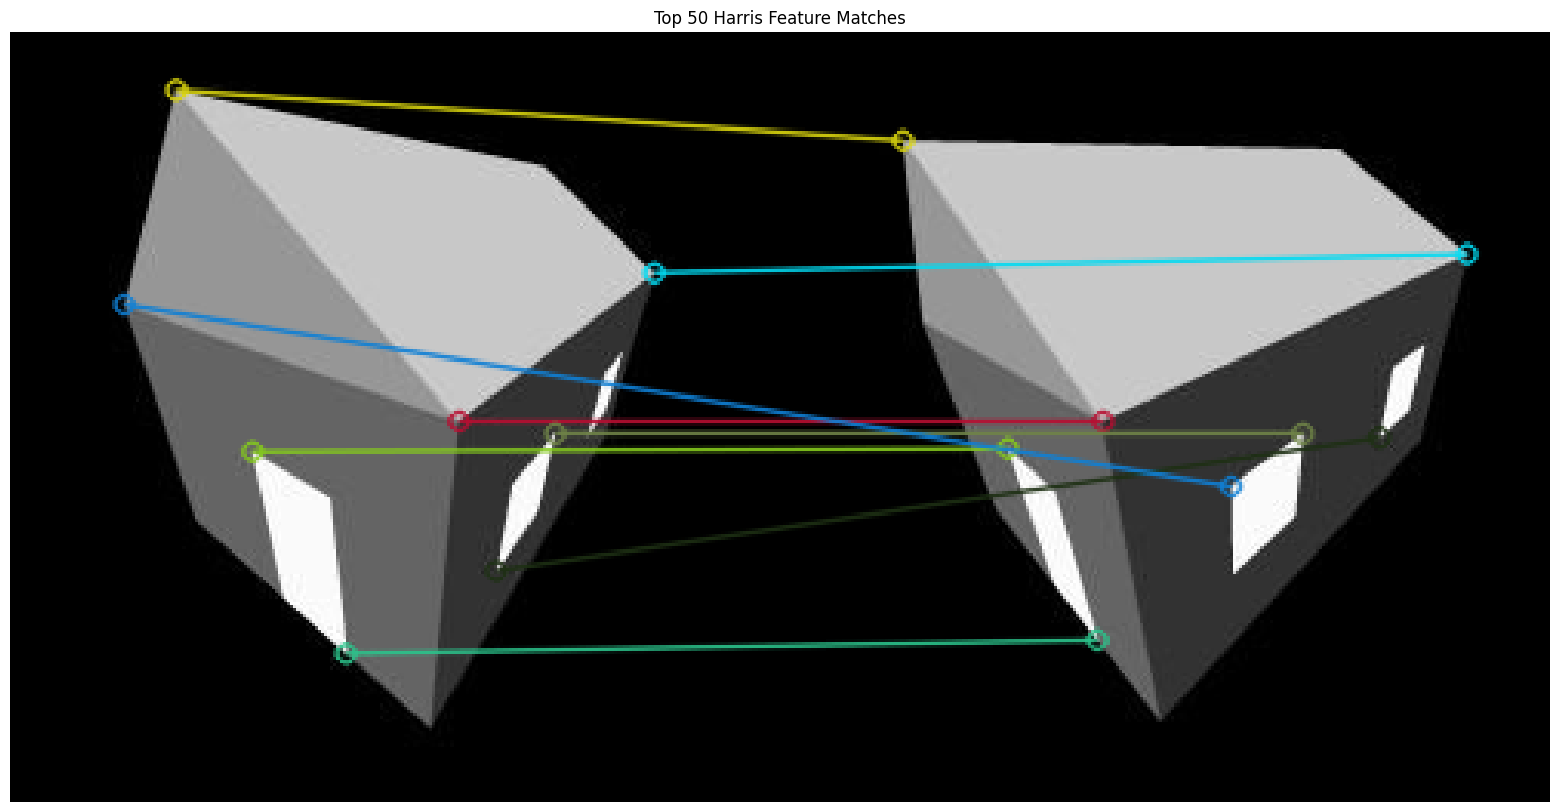

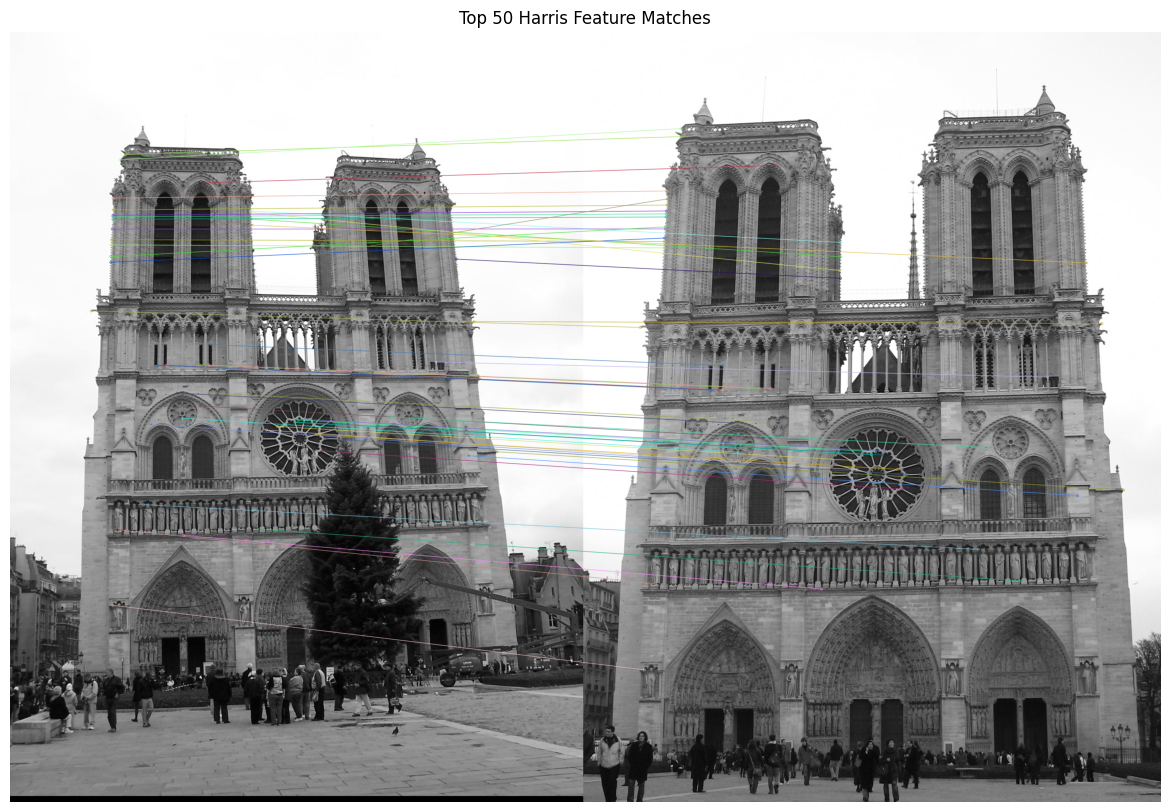

In [16]:
for img_path_1,img_path_2 in img_path_dict.items():
    compute_features_and_match_harris(img_path_1,img_path_2)